# **Used Car Price Prediction**

<div style='text-align: center'>
    <img src='usedcars.png' alt='usedcars' title='used_cars' width='800' height='500'/>
</div>

## Background
This goal of this project is to use machine learning methods (specifically Classification), to predict the prices of used cars based on location (`city`, `state`) and some properties of the car including the `model`, `make`, `mileage`, and `year of manufacture`.

## **Import Packages**

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Data Preprocessing**

In [27]:
# import and view dataset
df = pd.read_csv('true_car_listings.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [28]:
# Check variable types and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


We have `852,122` listings in the dataset. `Price`, `Year`, and `Mileage` are numeric variables, as they should be. `State`, `VIN`, `Make`, and `Model` have a `dtype` of `object`, as is appropriate. We go ahead to check the unique values of the categorical variables.

In [29]:
# check Missing values
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

Also, there is no missing data for any of the features or for the target variable.

### **Checking and dealing with duplicates**

In [30]:
# Check if there are any duplicates
duplicates = df.duplicated()

any_duplicates = duplicates.any()
print(f"Are there any duplicates? {any_duplicates}")

Are there any duplicates? True


In [31]:
# Check Duplication
df.duplicated().sum()

30

In [32]:
# Identify all duplicates, including their first occurrences
all_duplicates = df.duplicated(keep=False)

# Show duplicate rows, including the first occurrences
all_duplicate_rows = df[all_duplicates]
all_duplicate_rows.head(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
120829,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120830,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120831,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120832,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120833,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
120834,11495,2014,80086,Langhorne,PA,1G1JC6SH8E4194609,Chevrolet,SonicHatchback
120835,28800,2017,4165,Smyrna,GA,2GNFLGE38H6240856,Chevrolet,EquinoxAWD
120836,14771,2014,78400,New Haven,IN,1G1125S39EU113487,Chevrolet,Impala2LT
120837,15907,2015,65274,Corpus Christi,TX,2G1FB1E30F9190774,Chevrolet,CamaroCoupe
120838,12894,2014,57113,Delray Beach,FL,1G1RA6E44EU129757,Chevrolet,VoltPlug-In


In [33]:
# Remove the duplicates
df = df.drop_duplicates()
df.shape

(852092, 8)

### **Checking unique values of categorical variables**

In [34]:
# Print unique values for categorical variables
cat_vars = ['Year', 'State', 'City', 'Make', 'Model']

for var in cat_vars:
    print(f'Number of unique values for {var}: {df[var].nunique()}')

Number of unique values for Year: 22
Number of unique values for State: 59


Number of unique values for City: 2553
Number of unique values for Make: 58
Number of unique values for Model: 2736


In [35]:
# Check unique values of year
df['Year'].unique()

array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
       2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997],
      dtype=int64)

In [36]:
# Check unique values of states
df['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

We see that there are inconsistencies in the state name abbreviations. Both letters need to be capitalized. There is also unnecessary whitespace before each abbreviation. We need to correct these.

In [37]:
# Convert all state abbreviations to upper case and remove unnecessary whitespace
df['State']= df['State'].str.upper().str.strip()
print(df['State'].unique())
print('\nNumber of unique values for State:', df['State'].nunique())

['TX' 'NY' 'CO' 'UT' 'FL' 'CT' 'ID' 'ND' 'CA' 'NJ' 'OH' 'VA' 'IN' 'AZ'
 'OR' 'KS' 'NE' 'MA' 'MD' 'GA' 'MN' 'HI' 'LA' 'NM' 'IL' 'AL' 'PA' 'SC'
 'NC' 'WA' 'WI' 'OK' 'KY' 'MS' 'MO' 'ME' 'AR' 'MI' 'NV' 'TN' 'NH' 'DE'
 'WV' 'VT' 'SD' 'IA' 'RI' 'MT' 'DC' 'AK' 'WY']

Number of unique values for State: 51


### **Check for VIN consistency**

In [38]:
# Rename Vin
df = df.rename(columns={'Vin':'VIN'})

# Check if VIN is 17 characters
df['VIN Check'] = df['VIN'].apply(lambda x: len(x) == 17)

# Display the rows that do not meet the criterion
invalid_vins = df[~df['VIN Check']]

print(invalid_vins)

        Price  Year  Mileage         City State VIN    Make      Model  \
786930  11951  2007   114000  Sioux Falls    SD  69  Toyota  RAV4Sport   

        VIN Check  
786930      False  


There is one listing whose VIN is just `69` instead of the normal 17 characters. We will drop this observation from the data.

In [39]:
# Keep only observations that pass the VIN check and drop `VIN Check` variable
df = df[df['VIN Check']]
df = df.drop('VIN Check', axis=1)
df.head()

,Price,Year,Mileage,City,State,VIN,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


The first digit of the `VIN` indicates the country where it was manufactured. For cars manufactured in the US, the VIN begins with 1, 4, or 5. We use this information to create a variable indicate whether a car was manufactured in the US.

In [40]:
# Determine country of manufacture based on VIN
def get_country(vin):
    us_vin_prefixes = {'1', '4', '5'}
    if vin[0] in us_vin_prefixes:
        return 'US'
    else:
        return 'Outside US'

# Apply get_country to VIN column to create new column
df['Country of Manufacture'] = df['VIN'].apply(get_country)

In [41]:
# Check shape of data
df.shape

(852091, 9)

### **Checking for outliers**

Since the cars were released in different years, using global (for the whole dataset) values to check for outliers may negatively affect the results. Price changes over time affect monetary values, and older cars are more likely to have higher mileage. We therefore compute statistics (`25th percentile`, `75th percentile`, `IQR`) by year and use this to check for outliers.

In [42]:
mileage_stats = df.groupby('Year')['Mileage'].describe(percentiles=[.25, .75])
mileage_stats['IQR'] = mileage_stats['75%'] - mileage_stats['25%']
mileage_stats['Lower Bound'] = mileage_stats['25%'] - 1.5 * mileage_stats['IQR']
mileage_stats['Upper Bound'] = mileage_stats['75%'] + 1.5 * mileage_stats['IQR']

mileage_result = mileage_stats[['Lower Bound', 'Upper Bound']].reset_index()
mileage_result.columns = ['Year', 'Mileage Lower Bound', 'Mileage Upper Bound']

price_stats = df.groupby('Year')['Price'].describe(percentiles=[.25, .75])
price_stats['IQR'] = price_stats['75%'] - price_stats['25%']
price_stats['Lower Bound'] = price_stats['25%'] - 1.5 * price_stats['IQR']
price_stats['Upper Bound'] = price_stats['75%'] + 1.5 * price_stats['IQR']

price_result = price_stats[['Lower Bound', 'Upper Bound']].reset_index()
price_result.columns = ['Year', 'Price Lower Bound', 'Price Upper Bound']

results = pd.merge(mileage_result, price_result, on='Year')
results

,Year,Mileage Lower Bound,Mileage Upper Bound,Price Lower Bound,Price Upper Bound
0,1997,-52794.375,345992.625,-3495.250,13822.750
1,1998,-33201.000,322185.000,-3005.000,12995.000
2,1999,-39891.250,327910.750,-4497.000,15495.000
3,2000,-18191.000,292177.000,-3238.000,14730.000
4,2001,-13707.625,287757.375,-2505.000,14295.000
5,2002,-11577.625,277109.375,-3494.500,16477.500
6,2003,-2530.000,266134.000,-3012.500,17007.500
7,2004,3734.500,255378.500,-2505.000,17503.000
8,2005,4796.500,244144.500,-2242.500,18937.500
9,2006,11771.250,226689.250,-2992.500,20987.500


Some of the lower bounds are negative, and so we focus on the upper bounds. Every row that has price or mileage above the upper bound for a particular year is dropped.

In [43]:
# Merge average mileage with original dataframe
df = pd.merge(df, results[['Year', 'Mileage Upper Bound','Price Upper Bound']], on='Year')

#Drop cars with above-upper-bound mileage or price
df = df[(df['Mileage'] < df['Mileage Upper Bound']) | (df['Price'] < df['Price Upper Bound'])]
df = df.drop(columns=['Mileage Upper Bound', 'Price Upper Bound'])

df.head(10)

,Price,Year,Mileage,City,State,VIN,Make,Model,Country of Manufacture
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,US
1,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,US
2,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial,Outside US
3,14995,2014,23454,Hackettstown,NJ,19VDE1F31EE009243,Acura,ILX5-Speed,US
4,15499,2014,27171,Santa Ana,CA,JH4CU2F49EC005287,Acura,TSX5-Speed,Outside US
5,13499,2014,35037,West Covina,CA,19VDE1F32EE013995,Acura,ILX5-Speed,US
6,14999,2014,17669,Miami,FL,19VDE1F37EE015239,Acura,ILX5-Speed,US
7,15995,2014,37483,Egg Harbor,NJ,JH4CU2F80EC004208,Acura,TSXSpecial,Outside US
8,13995,2014,30214,Dumfries,VA,19VDE1F37EE014687,Acura,ILX5-Speed,US
9,15994,2014,18821,Wappingers Falls,NY,19VDE1F36EE011120,Acura,ILX5-Speed,US


In [44]:
# Check shape of data
df.shape

(852015, 9)

### **Exploratory Data Visualizations**

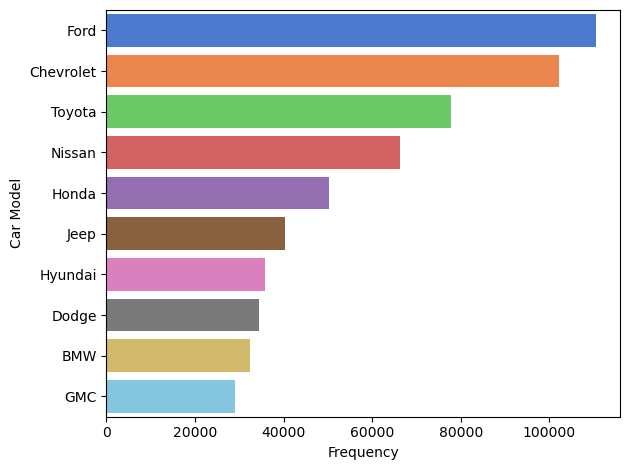

In [45]:
# Visualize top 10 car makes
top_car_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_car_makes.values, y=top_car_makes.index, palette='muted', saturation=0.95)
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [46]:
top_10_makes = 100*df['Make'].value_counts(normalize=True).head(10)
top_10_makes = top_10_makes.reset_index()
top_10_makes.columns = ['Make', 'Percentage']
top_10_makes['Cumulative Percentage'] = top_10_makes['Percentage'].cumsum()
top_10_makes

,Make,Percentage,Cumulative Percentage
0,Ford,12.957401,12.957401
1,Chevrolet,12.000141,24.957542
2,Toyota,9.128478,34.086020
3,Nissan,7.775685,41.861704
4,Honda,5.891093,47.752798
5,Jeep,4.738532,52.491329
6,Hyundai,4.205677,56.697007
7,Dodge,4.033145,60.730151
8,BMW,3.804510,64.534662
9,GMC,3.403344,67.938006


In [47]:
# Filter data for top  makes
top_makes = list(top_10_makes['Make'])
make_df = df[df['Make'].isin(top_makes)]

# Examine the models for each make
model_counts = make_df['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

df_models = pd.merge(model_counts, make_df[['Make', 'Model']], on='Model').drop_duplicates()

# Sort the counts within each make and get the top 3 models
top_models_per_make = df_models.sort_values(
    ['Make', 'Count'], ascending=[True, False]).groupby('Make').head(3)

# Re-arrange columns for clarity
cols = ['Make', 'Model', 'Count']
top_models_per_make = top_models_per_make[cols]

top_models_per_make

,Make,Model,Count
103959,BMW,3,11131
155769,BMW,5,5348
278700,BMW,4,2404
0,Chevrolet,Silverado,24919
144097,Chevrolet,EquinoxFWD,6223
175723,Chevrolet,MalibuLT,4515
24919,Dodge,Grand,16604
188653,Dodge,Ram,3985
305862,Dodge,DartSXT,2109
56025,Ford,F-1504WD,14176


The top 5 makes out of the 58 (*Ford*, *Chevrolet*, *Toyota*, *Nissan*, and *Honda*) account for almost half (`47.75%`) of the listings, and the top 10 makes account for `68%` of the listings.

Also, the most popular model for *BMW* is the *3 Series*, for *Chevrolet*, it is the *Silverado*, for *Dodge*, it is the *Grand Caravan*, and for *Ford*, it is the *F-150 4WD*.

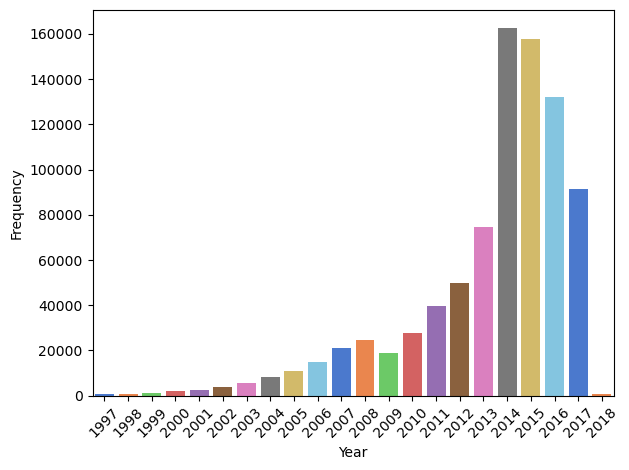

In [48]:
# Show number of listings for each year
sns.countplot(x=df['Year'], palette='muted', saturation=0.95)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Generally, newer cars are more popular on the used cars market than older ones. We see that very few listed cars were manufactured before the year 2000. The year with the highest number of listed cars is 2014. And since the data is from 2018, we see that very few listings from that year.

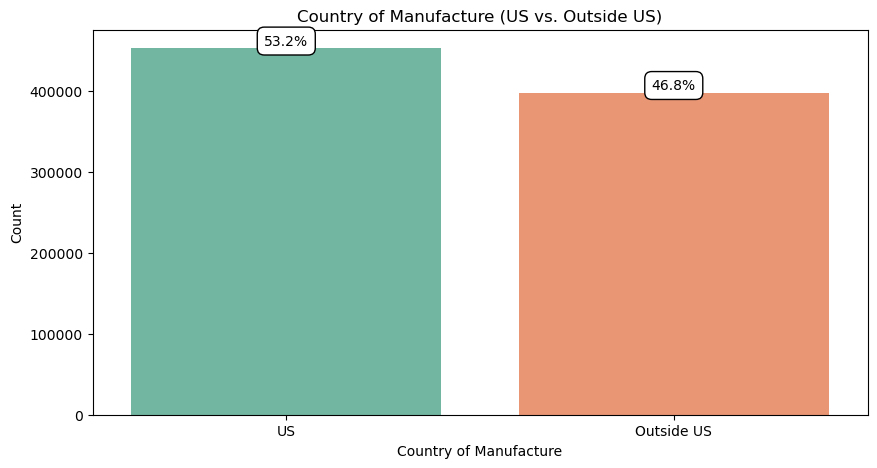

In [49]:
# Set up the figure and axes
plt.figure(figsize=(10, 5))

# Create the countplot
sns.countplot(x='Country of Manufacture', data=df, order=['US', 'Outside US'], palette='Set2')

# Set the title and labels
plt.title('Country of Manufacture (US vs. Outside US)')
plt.xlabel('Country of Manufacture')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for i, (value, count) in enumerate(df['Country of Manufacture'].value_counts().items()):
    percentage = f'{round(count / total * 100, 1)}%'
    plt.text(i, count, percentage, ha='center', va='bottom', fontsize=10, color='black', fontweight='normal', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot
plt.show()


The majority of cars listed in the dataset are manufactured within the US (`53%`) as opposed to outside the US.

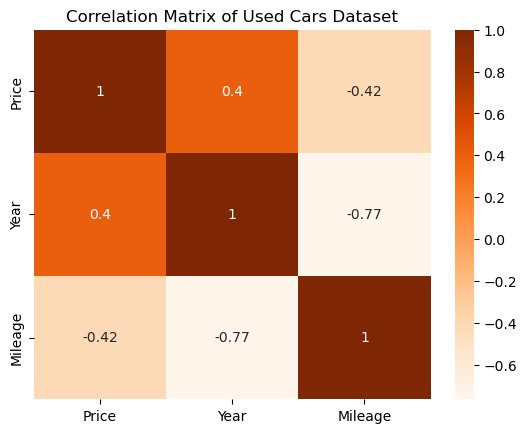

In [50]:
# Creating correlation matrix
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='Oranges')
plt.title('Correlation Matrix of Used Cars Dataset')
plt.show()

`Price` and `Mileage` are negatively correlated. This is understandble, since mileage is an indicator of the extent of use. Cars with high prior use, generally fetch a lower price on the market. `Mileage` is also negatively correlated with the `Year`. Newer cars will generally have less mileage since they have been driven for a shorter period of time. We also see a positive correlation between `Year` and `Price`. This indicates that newer cars generally have higher prices on the used car market.

## **Choosing Ford**

We have previously seen that *Ford* has the highest number of listings in the market, with 12.957% of all listings. This is closely followed by *Chevrolet* with 12.0% of all listings and then Toyota with 9.128%. In order to be able to do conduct deeper analysis, I focus the rest of my analysis only on Ford vehicle listings. 

In [51]:
# Create dataframes for only ford
ford_df = df[df['Make']=='Ford']
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110399 entries, 43982 to 851789
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Price                   110399 non-null  int64 
 1   Year                    110399 non-null  int64 
 2   Mileage                 110399 non-null  int64 
 3   City                    110399 non-null  object
 4   State                   110399 non-null  object
 5   VIN                     110399 non-null  object
 6   Make                    110399 non-null  object
 7   Model                   110399 non-null  object
 8   Country of Manufacture  110399 non-null  object
dtypes: int64(3), object(6)
memory usage: 8.4+ MB


In [52]:
# Print unique values for categorical variables
cat_vars = ['Year', 'State', 'City', 'Model']

for var in cat_vars:
    print(f'Number of unique values for {var}: {ford_df[var].nunique()}')

Number of unique values for Year: 22
Number of unique values for State: 51
Number of unique values for City: 2420
Number of unique values for Model: 147


In [53]:
base_models = ['Taurus', 'Focus', 'Fusion', 'Fiesta', 'Escape', 'Edge', 'Thunderbird', 'Ranger',
              'Mustang', 'F-150', 'F-250', 'F-350', 'Explorer', 'Transit', 'Super', 'Expedition',
              'Freestyle', 'Freestar', 'Escort', 'Crown', 'Windstar', 'Econoline', 'RangerEdge',
              'Club', 'Contour', 'Flex', 'C-Max', 'E-Series', 'Excursion', 'ZX2', 'Five', 'GT']

In [54]:
# Function to extract base model and features
def extract_base_and_features(model):
    for base_model in base_models:
        if base_model in model:
            base_len = len(base_model)
            features = model[base_len:].strip()
            return pd.Series([base_model, features if features else 'Regular'])
    return pd.Series(['Unknown', model])

# Apply the function to the Model column
ford_df[['Base Model', 'Features']] = ford_df['Model'].apply(extract_base_and_features)

In [55]:
# Cleaning up model names and features
ford_df.loc[ford_df['Features'] == 'erEdge', 'Base Model'] = 'Ranger'
ford_df['Features'][ford_df['Features'] == 'erEdge'] = 'Edge'

# Ford E-Series vehicles are also known as Econoline
ford_df['Base Model'][ford_df['Base Model'] == 'Econoline'] = 'E-Series'

# F-250 and F-350 are both Ford F-Series Super Duty vehicles
f_series = ['F-250', 'F-350']

for f in f_series:
    ford_df['Base Model'][ford_df['Base Model'] == f] = 'Super'

In [56]:
ford_df['Features'].unique()

array(['Regular', 'SE', 'S', 'Sedan', 'Titanium', 'Hatchback', '4dr',
       'Convertible', 'Coupe', '2WD', 'SEL', 'Base', 'Limited', 'XLT',
       'Police', 'V6', '4WD', 'Sport', 'SHO', 'FX4', 'King', 'EL',
       'SuperCrew', 'Hybrid', 'SuperCab', 'LTD', 'XL', 'FWD', 'Fastback',
       'Shelby', '5dr', '2dr', 'XLS', 'SPORT', 'GT', 'SVT', 'RWD', 'AWD',
       'Lariat', '2010', '3dr', 'Eddie', "'07", '5.4L', '4.6L', '137"',
       'Platinum', 'ST', 'EcoBoost', 'RS', 'Raptor', '2005', '119"',
       'Fleet', 'Edge', 'Cobra'], dtype=object)

In [57]:
ford_df['Base Model'].unique()

array(['Focus', 'Fusion', 'Fiesta', 'C-Max', 'Escape', 'Mustang', 'Edge',
       'F-150', 'Explorer', 'Taurus', 'Super', 'E-Series', 'Transit',
       'Flex', 'Expedition', 'Ranger', 'Five', 'Freestyle', 'Freestar',
       'Crown', 'GT', 'Thunderbird', 'Excursion', 'ZX2', 'Windstar',
       'Escort', 'Contour', 'Club'], dtype=object)

In [58]:
# Group states under Census Divisions
ford_df['Division'] = ford_df['State'].apply(lambda x: 'New England' if x in ['ME', 'VT', 'NH', 'MA', 'RI', 'CT']
                                 else 'Mid-Atlantic' if x in ['NY', 'NJ', 'PA']
                                 else 'South Atlantic' if x in ['DC', 'DE', 'MD', 'VA','WV', 'NC', 'SC', 'GA', 'FL']
                                 else 'East South Central' if x in ['KY', 'TN', 'AL', 'MS']
                                 else 'West South Central' if x in ['AR', 'LA', 'OK', 'TX']
                                 else 'East North Central' if x in ['OH', 'IN', 'IL', 'MI', 'WI']
                                 else 'West North Central' if x in ['MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
                                 else 'Mountain' if x in ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV']
                                 else 'Pacific' if x in ['WA', 'OR', 'CA', 'AK', 'HI']
                                 else None)

In [59]:
ford_df.head()

,Price,Year,Mileage,City,State,VIN,Make,Model,Country of Manufacture,Base Model,Features,Division
43982,10995,2014,20403,Leavenworth,KS,1FADP3R41EL264375,Ford,Focus,US,Focus,Regular,West North Central
43983,11997,2014,18520,Spokane,WA,1FADP3R44EL350442,Ford,Focus,US,Focus,Regular,Pacific
43984,11990,2014,17738,Olympia,WA,1FADP3R40EL260009,Ford,Focus,US,Focus,Regular,Pacific
43985,10889,2014,29057,Marysville,WA,1FADP3R40EL237619,Ford,Focus,US,Focus,Regular,Pacific
43986,11995,2014,20335,Boise,ID,1FADP3R47EL249668,Ford,Focus,US,Focus,Regular,Mountain


In [60]:
ford_df['Country of Manufacture'].value_counts(normalize=True)

Country of Manufacture
US            0.778956
Outside US    0.221044
Name: proportion, dtype: float64

We previously saw that majority of cars listed (`53%`) were manufactured outside the US. We now see that for Ford vehicles the percentage is much higher. About `78%` of Ford vehicles listed were manufactured in the US.

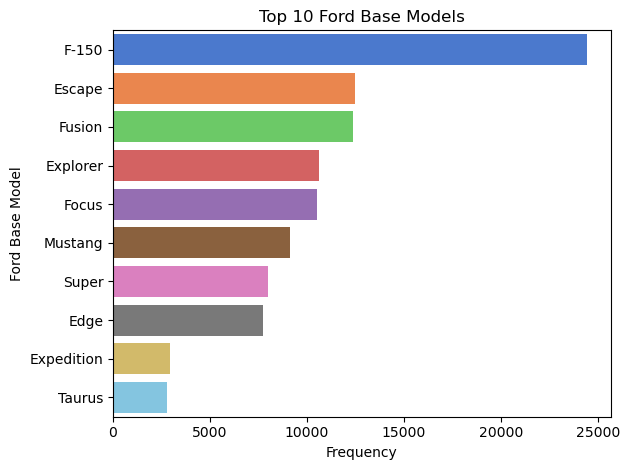

In [61]:
# Visualize top Ford models
top_base_model = ford_df['Base Model'].value_counts().head(10)
sns.barplot(x=top_base_model.values, y=top_base_model.index, palette='muted', saturation=0.95)
plt.title('Top 10 Ford Base Models')
plt.xlabel('Frequency')
plt.ylabel('Ford Base Model')
plt.tight_layout()
plt.show()

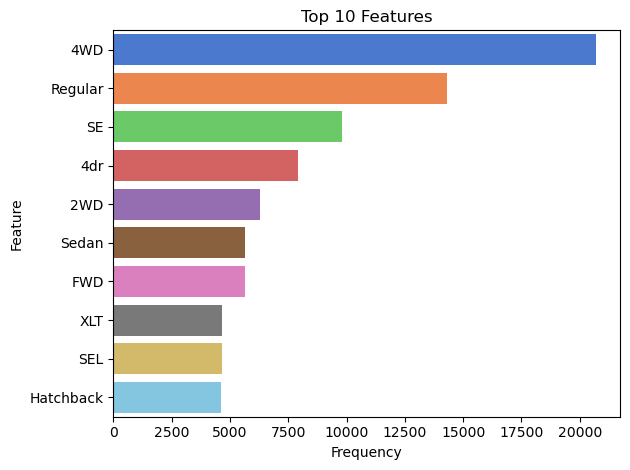

In [62]:
# Visualize top features
top_feats = ford_df['Features'].value_counts().head(10)
sns.barplot(x=top_feats.values, y=top_feats.index, palette='muted', saturation=0.95)
plt.title('Top 10 Features')
plt.xlabel('Frequency')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [63]:
avg_prices = ford_df.groupby('Base Model')['Price'].mean().reset_index()

# Get the top 5 most expensive and top 5 least expensive base models
top_5_expensive = avg_prices.nlargest(5, 'Price')
top_5_cheap = avg_prices.nsmallest(5, 'Price')

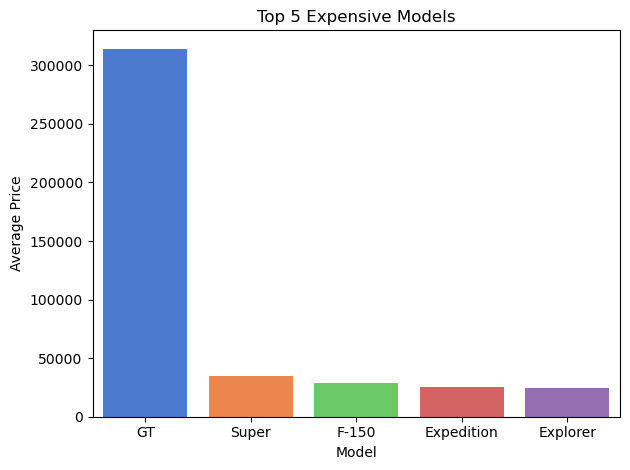

In [64]:
# View the most expensive
sns.barplot(x=top_5_expensive['Base Model'], y=top_5_expensive['Price'], palette='muted', saturation=0.95)
plt.title('Top 5 Expensive Models')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

The extremely high price of the Ford GT Supercar masks the differences in the average prices of the other models almost invisible. We can solve this problem by removing these listings from the dataset. The Ford GT is specifically designed for high speed racing, and only a few of them are built. Removing these observations is therefore not likely to affect the data and the results.

In [65]:
# Show Ford GT listings in the data
ford_df[ford_df['Base Model']=='GT']


,Price,Year,Mileage,City,State,VIN,Make,Model,Country of Manufacture,Base Model,Features,Division
690655,279900,2006,4327,Spring,TX,1FAFP90S76Y400391,Ford,GT2dr,US,GT,2dr,West South Central
690656,279500,2006,5730,West Palm Beach,FL,1FAFP90S06Y401043,Ford,GT2dr,US,GT,2dr,South Atlantic
690657,289888,2006,5248,New York,NY,1FAFP90S66Y400981,Ford,GT2dr,US,GT,2dr,Mid-Atlantic
690658,299800,2006,3950,Freeport,NY,1FAFP90S46Y400820,Ford,GT2dr,US,GT,2dr,Mid-Atlantic
690659,399888,2006,6215,Boerne,TX,1FAFP90S36Y400291,Ford,GT2dr,US,GT,2dr,West South Central
690660,399999,2006,3900,Jamaica,NY,1FAFP90S86Y401100,Ford,GT2dr,US,GT,2dr,Mid-Atlantic
828654,279888,2005,2973,Boerne,TX,1FAFP90SX5Y401548,Ford,GT2dr,US,GT,2dr,West South Central
828655,299999,2005,8718,Vista,CA,1FAFP90S35Y401617,Ford,GT2dr,US,GT,2dr,Pacific
828656,299000,2005,4479,Westville,NJ,1FAFP90S15Y401390,Ford,GT2dr,US,GT,2dr,Mid-Atlantic


In [66]:
# Drop all Ford GT listings
ford_df = ford_df.drop(ford_df[ford_df['Base Model']=='GT'].index)
ford_df.shape

(110390, 12)

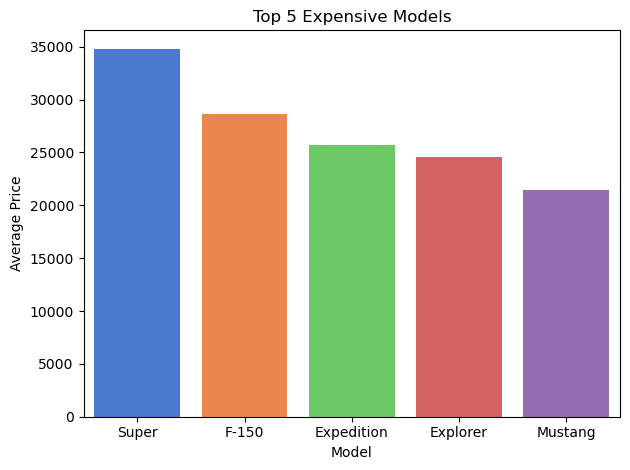

In [67]:
# Get the average price per base model
avg_prices = ford_df.groupby('Base Model')['Price'].mean().reset_index()

# Get the top 5 most expensive base models again
top_5_expensive = avg_prices.nlargest(5, 'Price')

# View the most expensive
sns.barplot(x=top_5_expensive['Base Model'], y=top_5_expensive['Price'], palette='muted', saturation=0.95)
plt.title('Top 5 Expensive Models')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

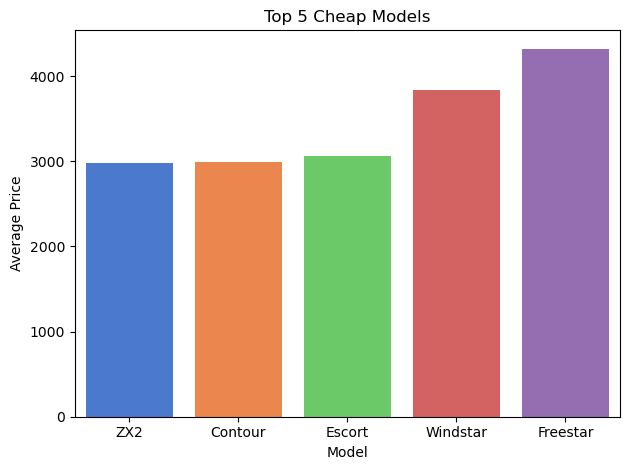

In [68]:
# View the cheapest models
sns.barplot(x=top_5_cheap['Base Model'], y=top_5_cheap['Price'], palette='muted', saturation=0.95)
plt.title('Top 5 Cheap Models')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

We now see that the most expensive vehicles are the Ford Super Duty truck (*F-250*, *F-350*, *F-450*) and the *F-150*. These are trucks that many times are used for heavy duty towing. The *Expedition* and *Explorer* are also SUVs and therefore generally have higher prices. The cheapest models are all older ones that are currently no longer produced by Ford.

## **Modelling**

In [69]:
# Drop 'Make', 'Model', and 'City' since will no longer need them
ford_df = ford_df.drop(columns=['Make', 'Model', 'City', 'VIN'])
ford_df.head()

,Price,Year,Mileage,State,Country of Manufacture,Base Model,Features,Division
43982,10995,2014,20403,KS,US,Focus,Regular,West North Central
43983,11997,2014,18520,WA,US,Focus,Regular,Pacific
43984,11990,2014,17738,WA,US,Focus,Regular,Pacific
43985,10889,2014,29057,WA,US,Focus,Regular,Pacific
43986,11995,2014,20335,ID,US,Focus,Regular,Mountain


In [70]:
ford_df.to_csv('used_cars3.csv')

In [71]:
ford_df.shape

(110390, 8)

In [72]:
# Encoding categorical variables
ford_df = pd.get_dummies(ford_df, columns=['Division', 'State', 'Features', 'Base Model', 
                                           'Features', 'Country of Manufacture'], drop_first=True)

# Check shape
ford_df.shape

(110390, 198)

In [73]:
# Identify duplicate columns
duplicate_columns = ford_df.columns[ford_df.columns.duplicated()]
duplicate_columns

Index(['Features_119"', 'Features_137"', 'Features_2005', 'Features_2010',
       'Features_2WD', 'Features_2dr', 'Features_3dr', 'Features_4.6L',
       'Features_4WD', 'Features_4dr', 'Features_5.4L', 'Features_5dr',
       'Features_AWD', 'Features_Base', 'Features_Cobra',
       'Features_Convertible', 'Features_Coupe', 'Features_EL',
       'Features_EcoBoost', 'Features_Eddie', 'Features_Edge', 'Features_FWD',
       'Features_FX4', 'Features_Fastback', 'Features_Fleet', 'Features_GT',
       'Features_Hatchback', 'Features_Hybrid', 'Features_King',
       'Features_LTD', 'Features_Lariat', 'Features_Limited',
       'Features_Platinum', 'Features_Police', 'Features_RS', 'Features_RWD',
       'Features_Raptor', 'Features_Regular', 'Features_S', 'Features_SE',
       'Features_SEL', 'Features_SHO', 'Features_SPORT', 'Features_ST',
       'Features_SVT', 'Features_Sedan', 'Features_Shelby', 'Features_Sport',
       'Features_SuperCab', 'Features_SuperCrew', 'Features_Titanium',
  

In [74]:
# Drop duplicate columns
ford_df = ford_df.loc[:,~ford_df.columns.duplicated()]
ford_df.shape

(110390, 143)

In [49]:
# import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

In [50]:
# Take logarithm of 'Price'
ford_df['log_Price'] = np.log(ford_df['Price'])

# Splitting the dataset into training and testing sets
X = ford_df.drop(['Price', 'log_Price'], axis=1)
y = ford_df['log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Linear Regression**

In [51]:
# Initializing the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting the values for the testing data
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Creating a DataFrame for actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Displaying the evaluation metrics and the first few rows of the results DataFrame
print('The Mean Average Error(MAE) is: ', mae)
print('The Mean Square Error(MSE) is: ', mse)
print('The Root Mean Square Error(RMSE) is: ', rmse)
print('The R Square is: ', r2)

results_df.head(10)

The Mean Average Error(MAE) is:  0.13333403094820803
The Mean Square Error(MSE) is:  0.035218831186909307
The Root Mean Square Error(RMSE) is:  0.18766680896447646
The R Square is:  0.8839719454915087


,Actual,Predicted
319674,10.397177,10.550096
276338,9.849031,10.003302
284173,9.471781,9.554194
338341,10.033507,10.048962
297660,10.106428,10.048104
285041,9.695848,9.677897
331680,10.118397,10.194182
247536,9.740910,9.677196
327431,10.449613,10.385832
339993,10.373335,10.623609


In [52]:
# Convert the log-transformed predictions back to the original scale
results_df['Actual'] = np.exp(results_df['Actual'])
results_df['Predicted'] = np.exp(results_df['Predicted'])

# Display the DataFrame to compare actual and predicted values in their original scale
results_df.head(10)

,Actual,Predicted
319674,32767.0,38181.121085
276338,18940.0,22099.318510
284173,12988.0,14103.723288
338341,22777.0,23131.758068
297660,24500.0,23111.914147
285041,16250.0,15960.900158
331680,24795.0,26747.116910
247536,16999.0,15949.709737
327431,34531.0,32397.344667
339993,31995.0,41093.637808


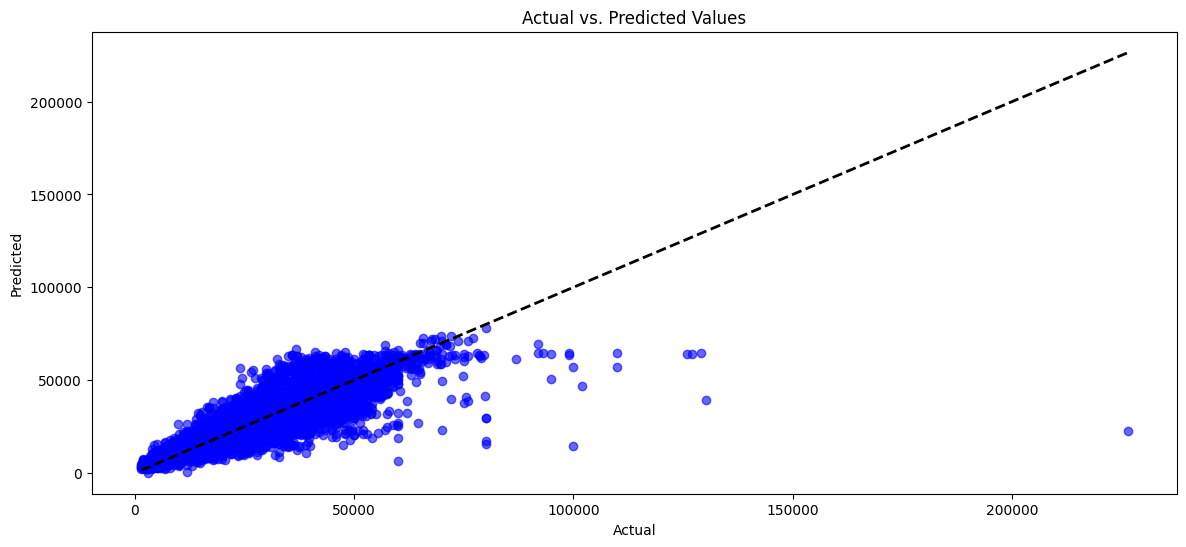

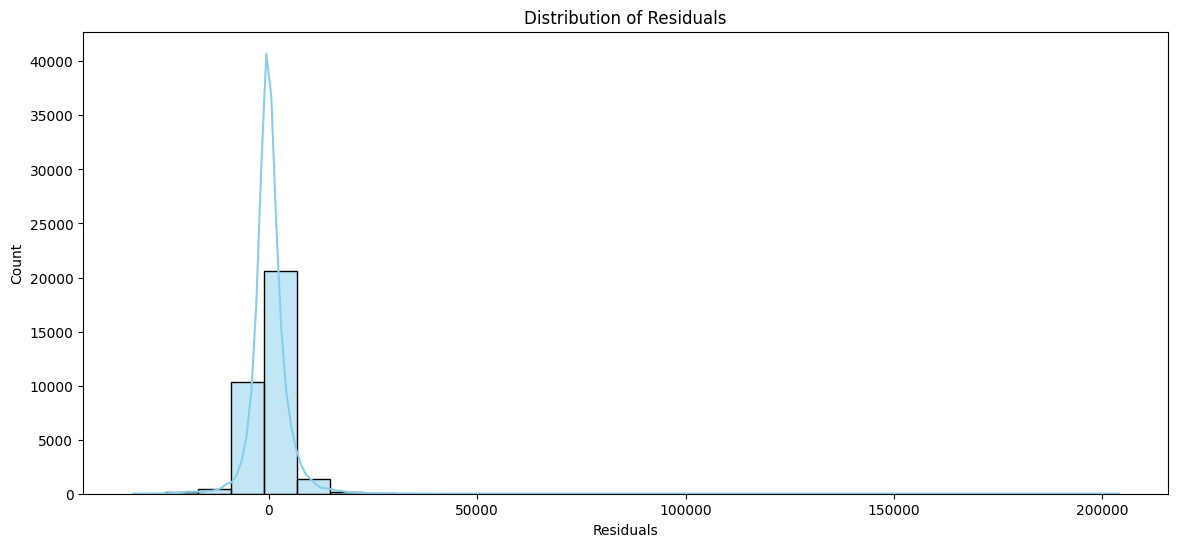

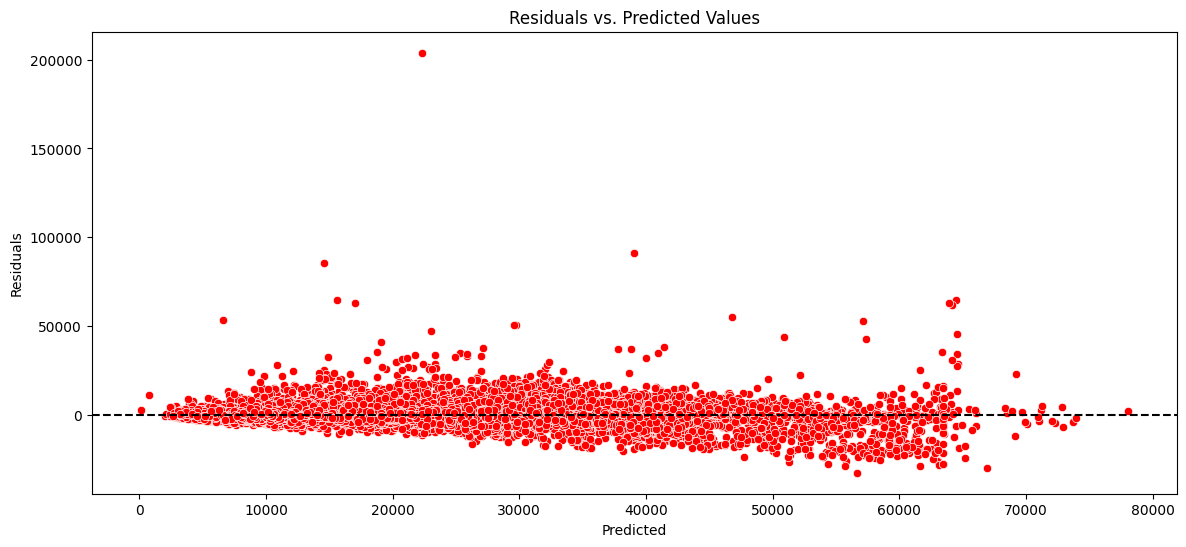

In [53]:
# Now we'll plot the actual vs. predicted values and check the distribution of residuals to assess the model fit.

# Transforming predictions back to the original scale
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# Plotting actual vs. predicted values
plt.figure(figsize=(14, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Calculating the residuals
residuals = y_test_original - y_pred_original

# Plotting the residuals distribution
plt.figure(figsize=(14, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Scatterplot of residuals versus predicted values
plt.figure(figsize=(14, 6))
sns.scatterplot(x=y_pred_original, y=residuals, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()


- The first plot shows the actual vs. predicted values. We'd like to see the points along the diagonal line, indicating that the predicted values are close to the actual values. While there is some scatter, many points do lie near the line, which is positive.

- The second plot shows the distribution of residuals (the differences between actual and predicted values). We're looking for a normal distribution centered around zero. The histogram suggests that the residuals are fairly normally distributed, but there might be a slight skewness to the right.

- The third plot shows residuals vs. predicted values. Ideally, the residuals should be randomly scattered around the horizontal line at zero, with no discernible pattern. This plot indicates a fairly random distribution, suggesting that the model's variance is constant across different predicted values, a sign of homoscedasticity, i.e., the size of the error does not change across different values of the independent variables. A model exhibiting homoscedasticity is likely to have better predictive performance and provides more reliable insights into how the predictors influence the response variable.


## **Decision Tree Regressions**

In [54]:
# Initialize the DecisionTreeRegressor
reg_dt = DecisionTreeRegressor(random_state=42)

# Define the grid of hyperparameters to search over
param_grid = {
    'max_depth': [4,6,8],
    'criterion': ['squared_error'],
    'splitter': ['best', 'random'],
}

# Set up the GridSearchCV with the DecisionTreeRegressor and defined parameters
tree_reg = GridSearchCV(reg_dt, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit the GridSearchCV to the training data to find the best hyperparameters
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics and the first few rows of the results DataFrame
print('Best Parameters: ' + str(tree_reg.best_params_))
print('The Mean Average Error(MAE) is: ', mae)
print('The Mean Square Error(MSE) is: ', mse)
print('The Root Mean Square Error(RMSE) is: ', rmse)
print('The R Square is: ', r2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'splitter': 'best'}
The Mean Average Error(MAE) is:  0.1701684356514859
The Mean Square Error(MSE) is:  0.05436731123741402
The Root Mean Square Error(RMSE) is:  0.23316798930688154
The R Square is:  0.8208874872008958


## **Extreme Gradient Boosting**

In [55]:
# Initializing the XGBoost classifier
xgb_reg = XGBRegressor(objective ='reg:squarederror', 
                       n_estimators=1000, 
                       max_depth=7, eta=0.1, 
                       subsample=0.7, colsample_bytree=0.8)

# Fitting the classifier to the training data
xgb_reg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = xgb_reg.predict(X_test)


# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics and the first few rows of the results DataFrame
print('The Mean Average Error(MAE) is: ', mae)
print('The Mean Square Error(MSE) is: ', mse)
print('The Root Mean Square Error(RMSE) is: ', rmse)
print('The R Square is: ', r2)

The Mean Average Error(MAE) is:  0.11739557992405812
The Mean Square Error(MSE) is:  0.02775185827723472
The Root Mean Square Error(RMSE) is:  0.16658889001741597
The R Square is:  0.9085718061506887


## **Random Forest Regression**

In [56]:
# Choose a random sample of 5000
sample_5k = ford_df.sample(n=5000, random_state=42)

# Splitting the dataset into training and testing sets
X = sample_5k.drop(['Price', 'log_Price'], axis=1)
y = sample_5k['log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Initializing the Random Forest classifier
params = {
    'criterion': ['squared_error', 'absolute_error'],
    'n_estimators': [100, 300],
    'max_features': ['sqrt', 'log2'],
}
rf = RandomForestRegressor(random_state = 42)

rf_reg = GridSearchCV(rf, param_grid=params, cv=3, verbose=True, n_jobs=-1)

# Fit the GridSearchCV to the training data to find the best hyperparameters
rf_reg.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_reg.predict(X_test)


# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics and the first few rows of the results DataFrame
print('Best Parameters: ' + str(rf_reg.best_params_))
print('The Mean Average Error(MAE) is: ', mae)
print('The Mean Square Error(MSE) is: ', mse)
print('The Root Mean Square Error(RMSE) is: ', rmse)
print('The R Square is: ', r2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 300}
The Mean Average Error(MAE) is:  0.14923567971051743
The Mean Square Error(MSE) is:  0.04713304572827165
The Root Mean Square Error(RMSE) is:  0.21710146413203124
The R Square is:  0.8573313473602888
